In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

arbres = pa.read_csv("./p2-arbres-fr.csv", sep=";")
print(arbres)
arbres.head(2)

             id type_emplacement domanialite     arrondissement  \
0         99874            Arbre      Jardin     PARIS 7E ARRDT   
1         99875            Arbre      Jardin     PARIS 7E ARRDT   
2         99876            Arbre      Jardin     PARIS 7E ARRDT   
3         99877            Arbre      Jardin     PARIS 7E ARRDT   
4         99878            Arbre      Jardin    PARIS 17E ARRDT   
...         ...              ...         ...                ...   
200132  2024741            Arbre      Jardin  BOIS DE VINCENNES   
200133  2024742            Arbre      Jardin  BOIS DE VINCENNES   
200134  2024743            Arbre      Jardin  BOIS DE VINCENNES   
200135  2024744            Arbre      Jardin  BOIS DE VINCENNES   
200136  2024745            Arbre      Jardin  BOIS DE VINCENNES   

       complement_addresse  numero  \
0                      NaN     NaN   
1                      NaN     NaN   
2                      NaN     NaN   
3                      NaN     NaN   
4    

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031


In [8]:
from collections import Counter

labels_unique=arbres.libelle_francais.unique()
labels=arbres.libelle_francais
occurences = arbres.libelle_francais.value_counts()
occurences_norm = arbres.libelle_francais.value_counts(normalize=True)
distribution = dict()
total = occurences.sum()
frequences_list = []
values_list =[]
names_list = []
for key, value in occurences.items():
  frequence = value/total
  distribution[f"{key}"] = [value, frequence]
distribution

for key, value in occurences.items():
   frequences_list.append(value/total)
   values_list.append(value)
   names_list.append(key)
frequences_list
values_list
names_list
occurences.describe()
occurences
#test = occurences.where(occurences.values < 3500).dropna()
#test
# total

Platane       42508
Marronnier    25207
Tilleul       21305
Erable        18389
Sophora       11797
              ...  
Cordyline         1
Camphrier         1
Jujubier          1
Maackie           1
Garrya            1
Name: libelle_francais, Length: 192, dtype: int64

In [3]:
np_distr = np.array([[key,value] for (key,value) in occurences.iteritems()])
np_distr[:5]

array([['Platane', '42508'],
       ['Marronnier', '25207'],
       ['Tilleul', '21305'],
       ['Erable', '18389'],
       ['Sophora', '11797']], dtype='<U32')

In [4]:
np_frequences = np.array([frequences_list])
np_values = np.array([values_list])
np_names = np.array([names_list])
np_dtr_f_str = np.concatenate((np_distr,np_frequences.T),axis=1)
np_dtr_f_str[:5]

array([['Platane', '42508', '0.21399516713652839'],
       ['Marronnier', '25207', '0.1268979057591623'],
       ['Tilleul', '21305', '0.10725432944019331'],
       ['Erable', '18389', '0.09257450664518728'],
       ['Sophora', '11797', '0.05938884414015304']], dtype='<U32')

In [5]:
var = np_frequences.dtype
seuil_mini = 3500
np_val_f = np.concatenate((np_values,np_frequences),axis=0)
np.where(np_val_f>10000)
np_val_f.dtype
np_val_f.shape
np_distribution = np.array([distribution])
test3 = occurences[:(len(occurences)-10)]
#test3mask[[occurence.where(occurences.values < seuil_mini)]] = False
#result = occurence[test3mask,...]

test1 = occurences.where(occurences.values < seuil_mini).sum()

Platane              42508.0
Marronnier           25207.0
Tilleul              21305.0
Erable               18389.0
Sophora              11797.0
Frêne                 5171.0
Pin                   4844.0
Micocoulier           4201.0
Chêne                 3866.0
Cerisier à fleurs     3767.0
autres               57585.0
Name: libelle_francais, dtype: float64

In [9]:
test2 = occurences.head(10)
test3
autres_sommes = occurences.tail(len(occurences)-10).sum()


Platane              42508.0
Marronnier           25207.0
Tilleul              21305.0
Erable               18389.0
Sophora              11797.0
Frêne                 5171.0
Pin                   4844.0
Micocoulier           4201.0
Chêne                 3866.0
Cerisier à fleurs     3767.0
autres               57585.0
Name: libelle_francais, dtype: float64

In [11]:
test4 = ['autres',10]

In [10]:
test2.loc['autres']=test1
test2

Platane              42508.0
Marronnier           25207.0
Tilleul              21305.0
Erable               18389.0
Sophora              11797.0
Frêne                 5171.0
Pin                   4844.0
Micocoulier           4201.0
Chêne                 3866.0
Cerisier à fleurs     3767.0
autres               57585.0
Name: libelle_francais, dtype: float64

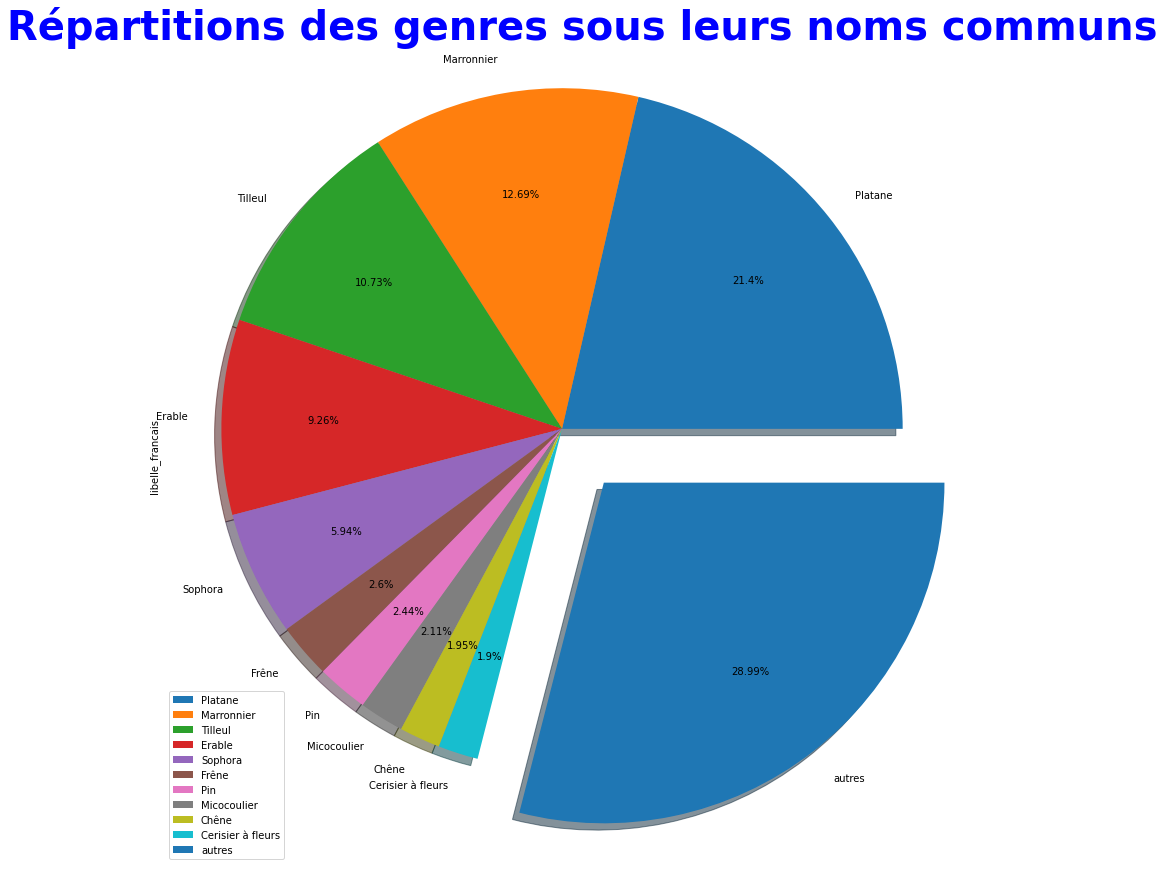

In [6]:
occurences
autres = occurences.where(occurences.values < 3500).dropna()
valeur = occurences[:10].keys
seuil_mini = 3500
occur_sum = occurences_norm.tail(len(occurences)-10).sum()
occur_head = occurences_norm.head(10)
occur_head.loc['autres'] = occur_sum


BIGGER_SIZE = 20
plt.figure(figsize=(15,15))
plt.tight_layout()
plt.title("Répartitions des genres sous leurs noms communs",
          fontdict={
              'fontsize':40,
              'fontweight':'bold',
              'color':'blue'})
occur_head.plot(kind='pie',
                explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2],
                autopct = lambda x: str(round(x, 2)) + '%',
                pctdistance = 0.7, labeldistance = 1.1,
                shadow = True)
plt.legend()
plt.axis('equal')
plt.show()


a utulise pour la futur representation hauteur localisation densite sur le territoire


C:\Users\anton\AppData\Local\Temp/ipykernel_14688/439323092.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


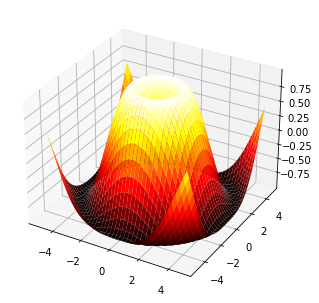

In [7]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

show()